## Taller 4: Primeros pasos en aprendizaje automático

El objetivo del presente taller es realizar el análisis de los datos suminsitrados y aplicar algunos algoritmos de aprendizaje automático para desarrollar un modelos de aprendizaje supervisado.


### Caso de estudio: 

**"Breast Cancer Wisconsin"** del repositorio UCI Machine Learning Repository. Los datos se pueden descargar aqui:  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic), pero también se han proporcionado en la carpeta con el presente NoteBook.

Información de los datos: Tomado de: "breast-cancer-wisconsin.names".

Esta base de datos de cáncer de mama se obtuvo de los Hospitales de la Universidad de Wisconsin, Madison del Dr. William H. Wolberg.

**Verificar los datos en el archivo wdbc.names y complementar la descripción de la data en este apartado**


completar...

In [1]:
#  Cargar los datos del archivo fuente, en un dataframe de pandas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("datos/wisc.csv")
df

,class,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [2]:
# Verificar los tipos de datos asignados a cada columna del dataFrame
print("Tipo de objeto: ", type(df))
print("Tipo de cada columna: \n", df.dtypes)

Tipo de objeto:  <class 'pandas.core.frame.DataFrame'>
Tipo de cada columna: 
 class           object
radius         float64
texture        float64
perimeter      float64
area           float64
smoothness     float64
compactness    float64
concavity      float64
concave        float64
symmetry       float64
fractal        float64
dtype: object


In [3]:
# Convertir los datos categóticos a numericos (enconding)
le = LabelEncoder()
le.fit(df['class'])
print('class', le.classes_)
df['class'] = le.transform(df['class'])
df

class ['B' 'M']


,class,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## Ejercicios propuestos

# Desarrollar paso a paso cada uno de los ejercicios enunciados. 

In [4]:
# 1. Seleccionar y cargar en un dataFrame solo los datos de la tabla inicial que corresponden a los paciente con tumor benigno
#    y en otro dataFrame, los de tumor maligno. Imprimir cada tabla por separado y resaltar la cantidad de ítems de cada clase.
dataFramerB=df[(df['class'] ==1)]
dataFramerM=df[(df['class'])==0]
print("Cantidad de Beninos ",len(dataFramerB))
print("Cantidad de Malignos ",len(dataFramerM))
dataFramerB.head()
dataFramerM.head()


Cantidad de Beninos  212
Cantidad de Malignos  357


,class,radius,texture,perimeter,area,smoothness,compactness,concavity,concave,symmetry,fractal
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503


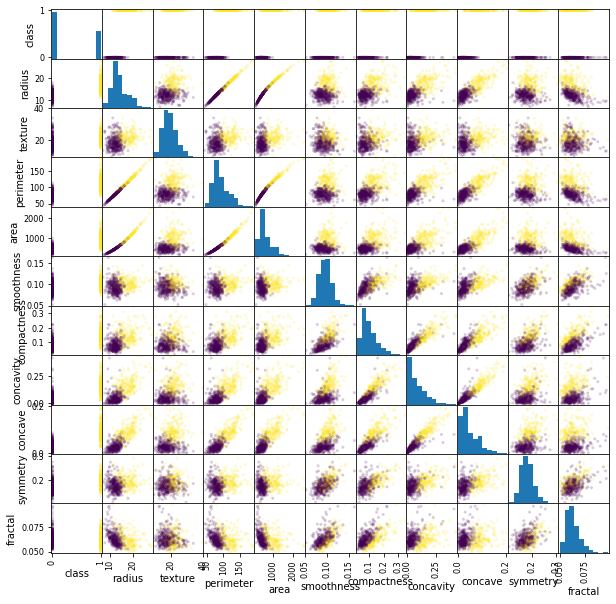

In [5]:
# 2. Visualizar los datos de todos los pares de combinaciones entre los atributos descriptores de cada paciente, mediante plotting.scatter_matrix
#    de pandas. Tener en cuenta solo usar los atributos que describen el tumor.
grafico1=pd.plotting.scatter_matrix(df, alpha=0.2,c=df.iloc[:,0], figsize=(10,10))




In [6]:
# 3. Dividir el conjunto de datos en un conjunto de entrenamiento y uno de prueba, utilizando los métodos 
#    suministrados por sckitlearn (train_test_split).
     # El conjunto de prueba debe tener el 30% del total de los datos.
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X=df[["radius","texture","perimeter","area","smoothness","compactness","concavity","concave","symmetry","fractal"]]
y=df["class"]
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, random_state=3, test_size=0.3)    



In [7]:
# 4. Determine el tamaño del conjunto de entrenamiento y el del conjunto de pruebas obtenido e 
    #identifique en cada conjunto, cuantos datos de cada clase existen. Imprima estos valores.

import numpy as np
X_entrenamiento.shape
y_entrenamiento.shape


(398,)

In [8]:
# 5. Compruebe si las proporción de clases en cada conjunto (prueba y entrenamiento) es similar
print(np.sum(y_entrenamiento==1))
print(np.sum(y_entrenamiento==0))


150
248


In [9]:
# 6. Crear un clasificador de tipo vecino mas cercano (knn), mediante KNeighborsClassifier, entrenarlo y probar el exito en la clasificación
#    mediante los conjuntos de prueba y entrenamiento.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_entrenamiento, y_entrenamiento)



y_predict = knn.predict(X_prueba)
print("Predicción: {}".format(y_predict))
knn.score(X_prueba, y_prueba)

Predicción: [0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0]


0.8947368421052632

In [10]:
# 7. Imprimir la matriz de confusión de acuerdo a los resultados obtenidos.
from sklearn.metrics import confusion_matrix
print("\nMatriz de confusión:")
skcm = confusion_matrix(y_prueba, y_predict)
# colocar en un dataframe para imprimir las etiquetas
skcm = pd.DataFrame(skcm, columns=['predice-0','predice-1'])
skcm['actual'] = ["Benino","Maligno"]
skcm = skcm.set_index('actual')
print(skcm)




Matriz de confusión:
         predice-0  predice-1
actual                       
Benino         101          8
Maligno         10         52


In [11]:
# 8. Realizar una análisis y descripción de los resultados obtenidos en la matriz de confusion. Escriba sus apreciaciones
#Maligno es 1 y Benino es 0

#Predice correctamente en benino 101 casos de 109
#Predice correctamente en maligno 52 de 62 

In [12]:
# 9. Calcule a partir de la matriz de confusión las métricas de rendimiento: Precisión, Recuperación y F1_Score. Utilizar classification_report
from sklearn.metrics import classification_report
print("\nReporte de la Clasificación:")
print(classification_report(y_prueba, y_predict, target_names=['Benino', 'Maligno']))



Reporte de la Clasificación:
              precision    recall  f1-score   support

      Benino       0.91      0.93      0.92       109
     Maligno       0.87      0.84      0.85        62

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171



In [13]:
# 10. Realizar un análisis y descripción de los resultados obtenidos en las métricas. Escriba sus apreciaciones
#Como y habiamos dicho de 109 predio correctamente 101 en el caso de Benino
#Igual en maligno de 62 predijo correctamente 52
#Eso nos dice que la tasa de error para Benino es 0.


In [14]:
# 11. Realizar validación cruzada para verificar la validez de los resultados con diferentes conjuntos de prueba y entrenamiento.
#     Utilizar el objeto cross_val_score, dividir en 10 conjuntos.Tenga en cuenta que debe utilizar todos los datos diposibles
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=3)
scores = cross_val_score(clf, X, y, cv=10)



In [15]:
#  12. Mostrar el score obtenido en cada iteración
scores


array([0.92982456, 0.80701754, 0.9122807 , 0.87719298, 0.92982456,
       0.94736842, 0.9122807 , 0.92982456, 0.94736842, 0.91071429])

In [16]:
# 13. calcular el promedio de acierto en la clasificación y la desviación estandar.
print("Promedio de acierto")
scores.mean()



Promedio de acierto


0.9103696741854638

In [17]:
print("Desviacion standar")
scores.std()

Desviacion standar


0.039576597853166924

In [18]:
# 14. Tener en cuenta : print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Precisión: 0.91 (+/- 0.08)


In [19]:
# 15. Coinciden estos valores con los de la matriz de confusion? Analize y escriba sus conclusiones
#Si coinciden por que tuvo una presicion del 91% de 109, acerto en 101 y 8 no fueran acertadas 



In [20]:
# 16.  Repetir los pasos del 6 al 15, utilizando el clasificador Naive Bayes
X=df[["radius","texture","perimeter","area","smoothness","compactness","concavity","concave","symmetry","fractal"]]
y=df["class"]
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, y, random_state=3, test_size=0.5)
from sklearn.naive_bayes import GaussianNB
naiveBayes = GaussianNB()
naiveBayes.fit(X_entrenamiento, y_entrenamiento)
y_predict = naiveBayes.predict(X_prueba)
print("Predicciones conjunto de prueba:\n {}".format(y_predict))
print("Resultado de la prueba: {:.2f}".format(naiveBayes.score(X_prueba, y_prueba)))
error = y_prueba==y_predict
print((error))
from sklearn.metrics import confusion_matrix
print("\nMatriz de confusión:")
skcm = confusion_matrix(y_prueba, y_predict)
# colocar en un dataframe para imprimir las etiquetas
skcm = pd.DataFrame(skcm, columns=['predice-0','predice-1'])
skcm['actual'] = ["Benino","Maligno"]
skcm = skcm.set_index('actual')
print(skcm)
from sklearn.metrics import classification_report
print("\nReporte de la Clasificación:")
print(classification_report(y_prueba, y_predict, target_names=['Benino', 'Maligno']))
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=3)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
print("Precisión: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Predicciones conjunto de prueba:
 [0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0
 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1]
Resultado de la prueba: 0.93
266     True
448     True
420     True
493     True
321     True
       ...  
439     True
50      True
38     False
498     True
5       True
Name: class, Length: 285, dtype: bool

Matriz de confusión:
         predice-0  predice-1
actual                       
Benino         171          8
Maligno         12         94

Reporte de la Clasificación:
     

In [21]:
# 17. Que diferencia ecuentra en los resultados de los dos clasificadores? Escriba sus conclusiones al respecto.
#A simple vista no encuentro diferencia, pues en la presicion nos da exactamente igual que con el de k vecinos cercanos
